In [2]:
%matplotlib inline
import numpy as np


What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed
   
<center>
    
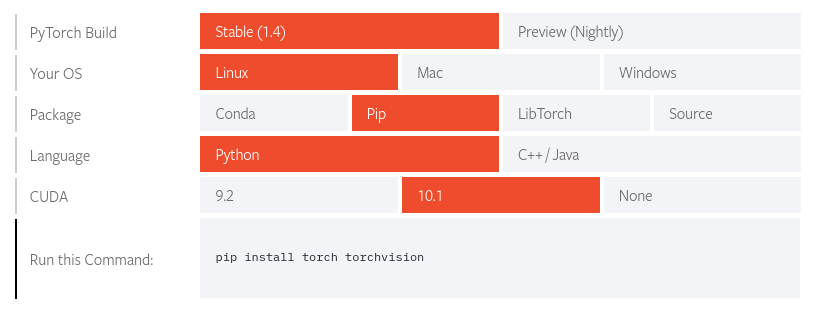
</center>

In [ ]:
import torch

Getting Started
---------------

Tensors
^^^^^^^

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.

In [12]:
import numpy as np
a = np.random.rand(10)
a

array([0.84856994, 0.989262  , 0.36766611, 0.73114894, 0.53732725,
       0.65561975, 0.81260343, 0.13998093, 0.26853046, 0.30175598])

In [13]:
a += 1
a

array([1.84856994, 1.989262  , 1.36766611, 1.73114894, 1.53732725,
       1.65561975, 1.81260343, 1.13998093, 1.26853046, 1.30175598])

In [3]:
import torch

ModuleNotFoundError: No module named 'torch'

Construct a 5x3 matrix, uninitialized:



In [0]:
x = torch.empty(5, 3)
print(x)

Construct a randomly initialized matrix:



In [0]:
x = torch.rand(5, 3)
print(x)

Construct a matrix filled zeros and of dtype long:



In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

Construct a tensor directly from data:



In [0]:
x = torch.tensor([5.5, 3])
print(x)

or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [0]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

Get its size:



In [0]:
print(x.size())

<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports all tuple operations.</p></div>

Operations
^^^^^^^^^^
There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1



In [0]:
y = torch.rand(5, 3)
print(x + y)

Addition: syntax 2



In [0]:
print(torch.add(x, y))

Addition: providing an output tensor as argument



In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

Addition: in-place



In [0]:
# adds x to y
y.add_(x)
print(y)

<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



In [0]:
print(x[:, 1])

Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [0]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [0]:
x = torch.randn(1)
print(x)
print(x.item())

**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  `here <http://pytorch.org/docs/torch>`_.

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

Converting a Torch Tensor to a NumPy Array
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [0]:
a = torch.ones(5)
print(a)

In [0]:
b = a.numpy()
print(b)

See how the numpy array changed in value.



In [0]:
a.add_(1)
print(a)
print(b)

Converting NumPy Array to Torch Tensor
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
See how changing the np array changed the Torch Tensor automatically



In [0]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [0]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!